표준 정규분포 함수는 평균이 0이고 표준편차가 1인 정규분포를 의미합니다. (The standard normal density function. A normal distribution with a mean of zero, and a standard deviation of 1.) 아래 코드에서 `easy_function`은 손으로 적분을 계산하기 비교적 쉽지만 `hard_function`은 닫힌 형식(closed form)으로 해가 존재하지 않습니다.

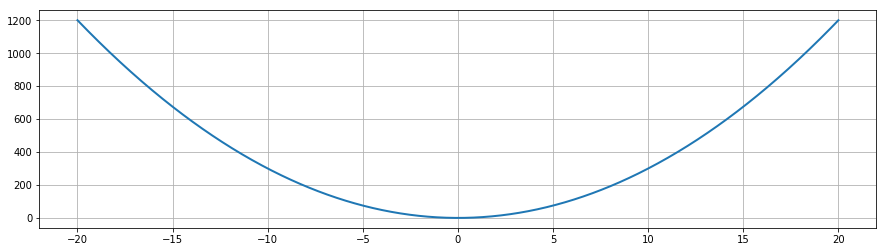

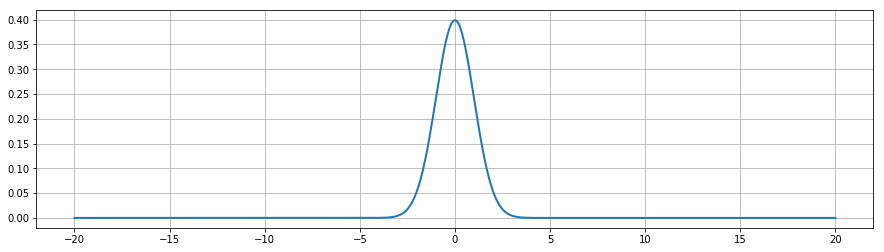

In [2]:
"""
Created on Sat Jul 15 10:43:57 2017
url : https://barnesanalytics.com/monte-carlo-integration-in-python
@author: ryan
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 차트의 기본 크기, 선 색, 두께 등의 기본값 설정
plt.rcParams["figure.figsize"] = (15,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

def easy_function(x):
    return((3)*(x**2))

def hard_function(x):
    return((1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2))

# 그냥 다항식
X=np.linspace(-20,20,1000)
plt.plot(X,easy_function(X))
plt.show()

# Standard Normal Density Function
plt.plot(X,hard_function(X))
plt.show()

Monte Carlo Integration은 그래프의 가장 높은 점과 낮은 점을 찾은 후 해당 점들을 기준으로 사각형 모양의 관심 영역을 지정합니다. 즉 함수 아래의 영역은 관심 영역의 일부분이므로, 직사각형 영역의 일부분의 비율을 계산하는 방법을 찾아야 합니다.

MC Integral의 핵심은 단순히 랜덤하게 관심 영역에 다트를 던진 후 함수 위에 있는 다트의 수와 아래에 있는 다트의 수를 계산하는 것입니다. 함수 아래 부분의 다트 개수 비율은 커브 아래의 면적의 비율과 얼추 비슷하게 근사됩니다. 다트를 던지는 횟수는 많으면 많을수록 좋으며 해당 과정을 수행하는 코드는 아래와 같습니다.

In [3]:
def integrate(x1,x2,func=easy_function,n=100000):
    X=np.linspace(x1,x2,1000)
    y1=0
    y2=max((func(X)))+1
    print('x1:'+str(x1)+',','x2:'+str(x2)+',','y1:'+str(y1)+',','y2:'+str(y2))
    area=(x2-x1)*(y2-y1)
    check=[]
    xs=[]
    ys=[]
    for i in range(n):
        x=np.random.uniform(x1,x2,1)
        xs.append(x)
        y=np.random.uniform(y1,y2,1)
        ys.append(y)
        if abs(y)>abs(func(x)) or y<0:
            check.append(0)
        else:
            check.append(1)
    return(np.mean(check)*area,xs,ys,check)

print(integrate(0.3,2.5)[0])
print(integrate(0.3,2.5,hard_function)[0])

x1:0.3, x2:2.5, y1:0, y2:19.75
15.664594000000001
x1:0.3, x2:2.5, y1:0, y2:1.3813878154605241
0.3730437795651146


여기서 우리는 `easy_function`에 대해 15.664의 답을 얻었는데, 실제 값인 15.628에 꽤 가까운 것을 알 수 있습니다. 더 많은 샘플 다트를 던져 본다면 정답에 더 근사할 것입니다. `hard_function`에서는 0.38 아래에 해당하는 곡선을 그리도록 했고, 마찬가지로 다트를 던져 본 결과 0.375 정도의 면적을 보이는 것으로 나타났습니다.

이제부터 아래 코드에서는 `easy_function`과 `hard_function`으로부터 원하는 영역을 지정해 Monte Carlo Integral을 수행하는 과정을 시각화해 보겠습니다.

x1:0.3, x2:14.5, y1:0, y2:631.75


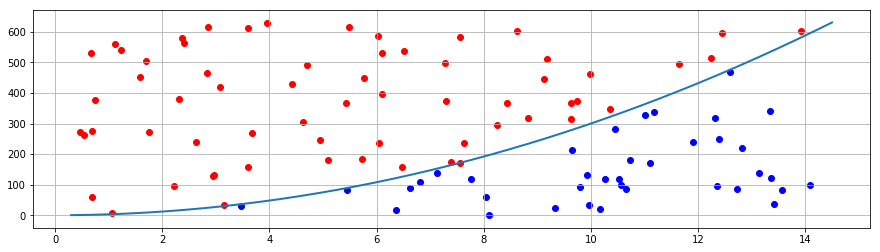

In [4]:
# x축 기준 0.3 ~ 14.5 사이 범위의 면적을 근사해 봅니다. 
_,x,y,c=integrate(0.3, 14.5, easy_function, n=100)
df=pd.DataFrame()
df['x']=x
df['y']=y
df['c']=c

X=np.linspace(0.3, 14.5, 1000)
plt.plot(X,easy_function(X))
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red')
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue')
plt.show()

x1:0, x2:3.5, y1:0, y2:1.3989422804014326


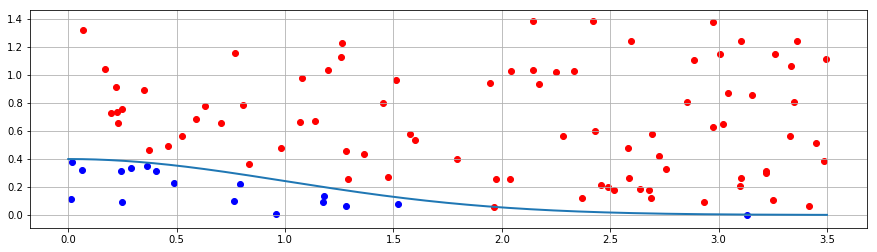

In [5]:
# x축 기준 0.0 ~ 3.5 사이 범위의 면적을 근사해 봅니다. 
_,x,y,c=integrate(0, 3.5, hard_function, n=100)
df=pd.DataFrame()
df['x']=x
df['y']=y
df['c']=c

X=np.linspace(0, 3.5, 1000)
plt.plot(X,hard_function(X))
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red')
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue')
plt.show()